# CS 5800 Final Project Scratch

## Wilson's algorithm to create a 3-D Maze.

12/1/21 - Currently, this notebook contains:
- a working Wilson's Algorithm
- a 3D visualization of the output maze.

To do: create version of algo that visualizes maze while it is getting constructed.

### Summary of Wilson's Algorithm

1. Start with a grid of vertices.

2. Choose a random target point, which is now "set in stone" as part of the maze.

3. Choose a random starting point. Do a loop-erased random walk until you hit the target. Save the directions of the vectors along this walk as "set in stone".

4. Choose a random starting point that is not part of the maze. Do a loop-erased random walk until you hit a node that is part of the set in stone maze. Save the directions of the vectors along this walk as part of the set in stone maze.

5. Repeat step 4 until all points have their direction set in stone.

In [7]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import random

In [52]:
def LEW(z, A, U):
    # input: a node z in tuple form; a list A of nodes in our maze; a set U of nodes in our universe
    # output: walk_v is a list of walk vertices; walk_d is a list of walk directions
    
    p = z
    walk_v = []
    walk_d = []
    
    while p not in A: # p is current node
        
        # create set of options
        directions = {(p[0]+1,p[1],p[2]),(p[0]-1,p[1],p[2]),(p[0],p[1]+1,p[2]),
                      (p[0],p[1]-1,p[2]),(p[0],p[1],p[2]+1),(p[0],p[1],p[2]-1)}
        
        viable_dirs = directions.intersection(U)
        
        # pick a viable direction with equal probability
        chosen_dir = random.choice(tuple(viable_dirs))
        
        # Overheard: "Sam! I thought you were my son! How are you doing, Sam? Well let's have a beer.
        
        # add p and chosen_dir to the official walk
        walk_v.append(p)
        walk_d.append(chosen_dir)
        
        # if chosen_dir leads us back to a spot from earlier on the walk, erase our record of that loop
        for i, node in enumerate(walk_v):
            if chosen_dir == node:
                del walk_v[i:]
                del walk_d[i:]
                break
        
        # move to the new p
        p = chosen_dir
        
    return walk_v, walk_d
        

In [58]:
LEW((1,1,1),[(1,1,4)],{(1,1,1),(1,1,2),(1,1,3),(1,1,4),(1,2,1),(1,2,2),(1,2,3),(1,2,4)})

([(1, 1, 1), (1, 2, 1), (1, 2, 2), (1, 1, 2), (1, 1, 3)],
 [(1, 2, 1), (1, 2, 2), (1, 1, 2), (1, 1, 3), (1, 1, 4)])

In [71]:
def create_maze(l,w,h):

    # establish what all the nodes are (coordinates):
    nodes = [(x,y,z) for x in range(l) for y in range(w) for z in range(h)]

    random.shuffle(nodes) # randomize the order

    U = set(nodes) # make a set for later

    # initialize the maze with the first node in the list
    maze_v = [nodes[0]]
    # initialize maze directions - the first one points to no other node
    maze_d = [None]

    for node in nodes[1:]:
    
        # do a LEW ending in the maze
        walk_v, walk_d = LEW(node, maze_v, U)
    
        # extend the maze lists with the output of LEW
        maze_v.extend(walk_v)
        maze_d.extend(walk_d)
    
    return maze_v, maze_d

In [125]:
maze_v, maze_d = create_maze(3,4,5)

In [147]:
segs = list(zip(maze_v, maze_d))[1:]

In [148]:
segs

[((2, 0, 1), (2, 0, 2)),
 ((2, 0, 2), (2, 0, 3)),
 ((2, 0, 3), (1, 0, 3)),
 ((1, 0, 3), (0, 0, 3)),
 ((0, 0, 3), (0, 1, 3)),
 ((0, 1, 3), (0, 1, 4)),
 ((0, 1, 4), (0, 0, 4)),
 ((0, 0, 4), (1, 0, 4)),
 ((1, 0, 4), (1, 1, 4)),
 ((1, 1, 4), (1, 2, 4)),
 ((1, 2, 4), (1, 3, 4)),
 ((1, 3, 4), (1, 3, 3)),
 ((1, 3, 3), (1, 2, 3)),
 ((1, 2, 3), (0, 2, 3)),
 ((2, 1, 4), (1, 1, 4)),
 ((1, 1, 1), (1, 1, 2)),
 ((1, 1, 2), (1, 0, 2)),
 ((1, 0, 2), (2, 0, 2)),
 ((2, 3, 2), (2, 2, 2)),
 ((2, 2, 2), (2, 1, 2)),
 ((2, 1, 2), (2, 0, 2)),
 ((2, 3, 0), (2, 3, 1)),
 ((2, 3, 1), (2, 3, 2)),
 ((0, 2, 1), (0, 2, 0)),
 ((0, 2, 0), (0, 3, 0)),
 ((0, 3, 0), (1, 3, 0)),
 ((1, 3, 0), (1, 2, 0)),
 ((1, 2, 0), (1, 2, 1)),
 ((1, 2, 1), (1, 1, 1)),
 ((0, 2, 4), (0, 3, 4)),
 ((0, 3, 4), (0, 3, 3)),
 ((0, 3, 3), (0, 2, 3)),
 ((0, 0, 0), (1, 0, 0)),
 ((1, 0, 0), (1, 1, 0)),
 ((1, 1, 0), (1, 1, 1)),
 ((1, 0, 1), (1, 0, 0)),
 ((2, 0, 0), (2, 0, 1)),
 ((0, 1, 2), (0, 0, 2)),
 ((0, 0, 2), (0, 0, 3)),
 ((0, 3, 2), (0, 3, 1)),


In [ ]:
# visualize final maze
# note it's in 3 dimensions

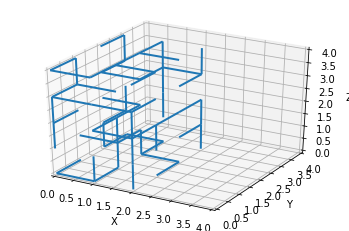

In [149]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.art3d import Line3DCollection

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = plt.axes(projection='3d')

# edit this according to 3D stuff
#lines = [[(0, 1, 0), (1, 1, 0)], [(2, 3, 1), (3, 3, 1)], [(1, 2, 1), (1, 3, 1)]]
#lines = [((0, 1, 0), (1, 1, 0)), ((2, 3, 1), (3, 3, 1)), ((1, 2, 1), (1, 3, 1))]
#c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])

lc = Line3DCollection(segs, linewidths=2)

####fig, ax = pl.subplots()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.add_collection3d(lc)
ax.set_xlabel('X')
ax.set_xlim3d(0, 4)
ax.set_ylabel('Y')
ax.set_ylim3d(0, 4)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 4)
ax.margins(1)

The above plot gives a decent visualization of the maze. The blue line segments are the maze paths - imagine they're tubes that kids crawl through at the McDonald's PlayPlace. I would like to draw them more like tubes (wider), but that's not easy to do in 3D Matplotlib.

Other improvements to consider:
 - segments get different rainbow colors based on when during the algorithm they were added to the maze (doable using my techniques)
 - use transparency based on how far away from our viewpoint - would help give a better 3D effect (not sure whether this is easy or not)

### Next step of project: develop version of the algorithm that plots each step during creation.

# Scrap code below

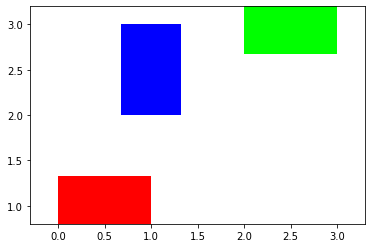

In [85]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc

lines = [[(0, 1), (1, 1)], [(2, 3), (3, 3)], [(1, 2), (1, 3)]]
c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])

lc = mc.LineCollection(lines, colors=c, linewidths=60)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)

# credit to HYRY and gtsiam on stackoverflow

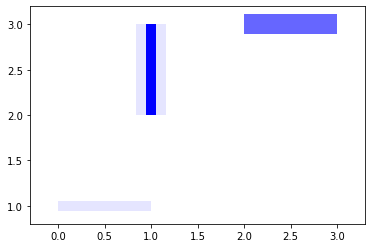

In [117]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc



lines = [[(0, 1), (1, 1)], [(2, 3), (3, 3)], [(1, 2), (1, 3)], [(1, 2), (1, 3)]]
c = np.array([(0, 0, 1, 0.1), (0, 0, 1, 0.6), (0, 0, 1, 0.1), (0, 0, 1, 1)])

lc = mc.LineCollection(lines, colors=c, linewidths=(10,20,30,10))
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)

# credit to HYRY and gtsiam on stackoverflow


# this birds-eye view approach is possible, but I'd rather work with the 3D view for now

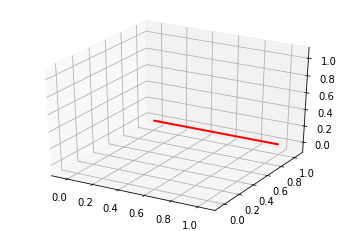

In [120]:
ax.autoscale()
ax.margins(0.1)

In [ ]:
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('X')
ax.set_xlim3d(0, 4)
ax.set_ylabel('Y')
ax.set_ylim3d(0, 4)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 4)

In [ ]:
poly3d = [[tupleList[vertices[ix][iy]] for iy in range(len(vertices[0]))] for ix in range(len(vertices))]
ax.scatter(x,y,z)
ax.add_collection3d(Poly3DCollection(poly3d, facecolors='w', linewidths=1, alpha=0.5))
ax.add_collection3d(Line3DCollection(poly3d, colors='k', linewidths=0.2, linestyles=':'))

In [ ]:
# takes a list of lines, where each line is an array-like

ValueError: 'vertices' must be a 2D list or array with shape Nx2

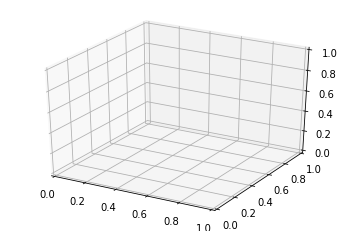

In [76]:
# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');